In [1]:
import pandas as pd
import seaborn as sns
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt

from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
from dateutil import parser

# Set the default style
plt.style.use("ggplot") 



In [2]:
#%pip install python-dateutil
# %pip install xlrd

## The code below has read in the location and route data

In [3]:
all_route_data = pd.read_csv("/home/nash/Desktop/IDS/IDS_project/IDS2019_project_team_M15_data/all_route_data.csv", low_memory=False)

all_location_data = pd.read_csv("/home/nash/Desktop/IDS/IDS_project/IDS2019_project_team_M15_data/all_location_data.csv", low_memory=False)



In [4]:
### # drop NAN values
all_route_data = all_route_data.dropna()
all_route_data.isna().sum()


Unnamed: 0          0
route_code          0
cyclenumber         0
unlockedat          0
unlockedattime      0
lockedat            0
lockedattime        0
startstationname    0
endstationname      0
rfidnumber          0
length              0
DurationMinutes     0
CycleType           0
costs               0
Membership          0
dtype: int64

In [5]:
all_location_data = all_location_data.dropna()
all_location_data.isna().sum()

Unnamed: 0     0
route_code     0
cyclenumber    0
latitude       0
longitude      0
coord_date     0
coord_time     0
dtype: int64


## The code below has reads in the bus validation data

In [6]:
                         
all_bus_validation = pd.read_csv("/home/nash/Desktop/IDS/IDS_project/IDS2019_project_team_M15_data/all_bus_validation_from_june_to_sept.csv", low_memory=False)


In [7]:
all_location_data.head()

,Unnamed: 0,route_code,cyclenumber,latitude,longitude,coord_date,coord_time
0,0,1560855535690,2450,58.361152,26.771542,2019-06-18,14:13:45+00
1,1,1560855535690,2450,58.359850,26.769987,2019-06-18,14:14:30+00
2,2,1560855535690,2450,58.359698,26.769787,2019-06-18,14:14:35+00
3,3,1560855535690,2450,58.359553,26.769590,2019-06-18,14:14:40+00
4,4,1560855535690,2450,58.359327,26.769295,2019-06-18,14:14:45+00


In [8]:
all_route_data.head()

,Unnamed: 0,route_code,cyclenumber,unlockedat,unlockedattime,lockedat,lockedattime,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
0,0,1559465761445,90417.0,2019-06-02,11:56:01,2019-06-02,11:58:37,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
1,1,1559486513829,90461.0,2019-06-02,17:41:53,2019-06-02,17:43:10,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2,2,1559549988096,2058.0,2019-06-03,11:19:48,2019-06-03,12:30:41,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
3,3,1559555230815,2421.0,2019-06-03,12:47:10,2019-06-03,12:53:28,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
4,4,1559555553023,2359.0,2019-06-03,12:52:33,2019-06-03,12:54:08,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


# Exploring bus validation data

In [9]:
# making a copy of data to have a back incase something goes wrong

all_bus_validation_copy = all_bus_validation.copy(deep=True)

all_bus_validation_copy.columns = ['Bike ID', 'Line', 'Direction', 'Time', 'Product Name', 'Product ID', 'Stop', 'Stop Code', 'Passengers']
all_bus_validation_copy


#all_bus_validation

,Bike ID,Line,Direction,Time,Product Name,Product ID,Stop,Stop Code,Passengers
0,0,Liin,Suund,Aeg,Toote nimetus,Toote ID,Peatus,Peatuse kood,Reisijaid
1,1,1,B>A,2019-06-01 06:48:48,Üksikpilet,6048,Nõlvaku,7820165-1,1
2,2,3,A>A,2019-06-01 07:01:37,Üksikpilet,6048,Nõlvaku,7820165-1,1
3,3,9,A2>A,2019-06-01 07:13:20,Üksikpilet,6048,Alasi,7820008-1,1
4,4,7,A1>B,2019-06-01 07:54:37,Üksikpilet,6048,Kvissentali,7820116-1,1
...,...,...,...,...,...,...,...,...,...
3395055,339637,1,A>B,2019-10-01 00:12:34,Tartu 30 päeva e-pilet,6053,Kesklinn II,7820088-1,1
3395056,339638,1,A>B,2019-10-01 00:12:35,Tartu 30 päeva e-sooduspilet üliõpilane ja pen...,6088,Kesklinn II,7820088-1,1
3395057,339639,4,B>A,2019-10-01 00:14:49,Tartu 30 päeva e-sooduspilet õpilane ja raske ...,6092,Kabeli,7820065-1,1
3395058,339640,1,B>A,2019-10-01 00:16:29,Tartu 30 päeva e-sooduspilet õpilane ja raske ...,6092,Kesklinn IV,7820085-2,1


In [10]:
# ## # memory cosumption of all data


# loc_memory = all_location_data.memory_usage(deep=True).sum()
# rou_memory = all_route_data.memory_usage(deep=True).sum()
# bus_val_memory = all_bus_validation_copy.memory_usage(deep=True).sum()

# print('location data memory', loc_memory/1000000, 'Megabyte')
# print('\n')
# print('route data memory', rou_memory/1000000, 'Megabyte')
# print('\n')
# print('bus validation  data memory', bus_val_memory/1000000, 'Megabyte')


In [11]:
## # dopping the first row which contain string as the name, since the column has been renamed properly.
## # then grabbing the unique content of product name, so that it can be translated to english.

all_bus_validation_copy = all_bus_validation_copy.drop(all_bus_validation_copy.index[0])
#all_bus_validation_copy["Product Name"].unique()


## # translating all product name content to english
all_bus_validation_copy["Product Name"] = all_bus_validation_copy["Product Name"].replace({'Üksikpilet': 'Single ticket', 'Tasuta pilet': 'Free ticket',
                                                 'Tartu 30 päeva e-sooduspilet õpilane ja raske puudega isik': 'Tartu 30-day e-discount ticket for student and severely disabled',
                                                 'Tartu 30 päeva e-pilet': 'Tartu 30 day e-ticket','Tartu 30 päeva e-sooduspilet üliõpilane ja pensionär': 'Student and pensioner in Tartu 30 day e-discount ticket',
                                                 'Tartu 90 päeva e-pilet': 'Tartu 90-day e-ticket','Validaatori soodusüksikpilet': 'Validator discount unit ticket',
                                                 'Tartu 10 päeva e-pilet': 'Tartu 10 days e-ticket',
                                                 'Tartu tasuta pilet': 'Tartu free ticket',
                                                 'Validaatori üksikpilet': 'Single validator ticket','Tartu ühe tunni 1 sõbra pilet': 'Take an hour sõbra pilet',
                                                 'Tartu saatjaga tasuta pilet': 'Free ticket with Tartu escort',
                                                 'Tartu 10 päeva e-sooduspilet (õp.,üliõp.,vanduspens.,raske puue)': 'Tartu 10-day e-discount ticket (study, student, sworn pension, severe disability)',
                                                 'Tasuta pilet validaatorist': 'Free ticket from the validator','Tunnipilet': 'Hour tickets','Tartu e-päevapilet': 'Tartu e-ticket',
                                                 'Soodustunnipilet': 'Discount hour ticket','Tartu ühe tunni 5 sõbra pilet': 'one hour ticket from 5 friends',
                                                 'Tartu ühe tunni 3 sõbra pile': 'one hour ticket for 3 friends',
                                                 'Tartu e-sooduspäevapilet': 'Tartu e-discount day ticket','Tartu ühe tunni 2 sõbra pilet': 'one hour ticket for 2 friends',
                                                 'Tartu ühe tunni 4 sõbra pilet': 'one hour ticket from 4 friends',
                                                 'Tartu päevapilet validaatorist': 'Tartu daily ticket from the Validator','Tartu tunnipilet bussijuhilt': 'Take a bus ticket from the bus driver',
                                                 'Tartu üksikpilet validaatorist': 'Single ticket from Tartu Validator','Tartu tunnipilet validaatorist': 'Tartu hour ticket from the validator',
                                                 'Tartu soodus üksikpilet validaatorist': 'Tartu single ticket from validator','Tartu soodustunnipilet õpilasele ja üliõpilasele': 'Tartu discounted hour ticket for pupils and students',
                                                 'Tartu soodus päevapilet validaatorist': 'Tartu discounted daily ticket from the validator',
                                                 'Tartu ühe tunni QR pilet': 'one-hour QR ticket'})


all_bus_validation_copy["Product Name"].unique()

array(['Single ticket', 'Free ticket',
       'Tartu 30-day e-discount ticket for student and severely disabled',
       'Tartu 30 day e-ticket',
       'Student and pensioner in Tartu 30 day e-discount ticket',
       'Tartu 90-day e-ticket', 'Tartu eaka tasuta pilet',
       'Validator discount unit ticket', 'Tartu 10 days e-ticket',
       'Tartu free ticket', 'Single validator ticket',
       'Take an hour sõbra pilet', 'Free ticket with Tartu escort',
       'Tartu 10-day e-discount ticket (study, student, sworn pension, severe disability)',
       'Free ticket from the validator', 'Hour tickets', 'Tartu e-ticket',
       'Discount hour ticket', 'one hour ticket from 5 friends',
       'Tartu ühe tunni 3 sõbra pilet', 'Tartu e-discount day ticket',
       'one hour ticket for 2 friends', 'one hour ticket from 4 friends',
       'Toote nimetus', 'Tartu daily ticket from the Validator',
       'Take a bus ticket from the bus driver',
       'Single ticket from Tartu Validator',
    

In [12]:

smart_bike_free_xlsx = pd.read_excel("/home/nash/Desktop/IDS/IDS_project/IDS2019_project_team_M15_data/free_data_july_2019/Smart_bike_tartu_july_2019.xlsx",
                                     sheet_name='Tartu_Smart_Bike_July_2019')


In [13]:
all_bus_validation_copy

,Bike ID,Line,Direction,Time,Product Name,Product ID,Stop,Stop Code,Passengers
1,1,1,B>A,2019-06-01 06:48:48,Single ticket,6048,Nõlvaku,7820165-1,1
2,2,3,A>A,2019-06-01 07:01:37,Single ticket,6048,Nõlvaku,7820165-1,1
3,3,9,A2>A,2019-06-01 07:13:20,Single ticket,6048,Alasi,7820008-1,1
4,4,7,A1>B,2019-06-01 07:54:37,Single ticket,6048,Kvissentali,7820116-1,1
5,5,20,A3>B,2019-06-01 07:21:56,Single ticket,6048,Kesklinn,7820088-1,1
...,...,...,...,...,...,...,...,...,...
3395055,339637,1,A>B,2019-10-01 00:12:34,Tartu 30 day e-ticket,6053,Kesklinn II,7820088-1,1
3395056,339638,1,A>B,2019-10-01 00:12:35,Student and pensioner in Tartu 30 day e-discou...,6088,Kesklinn II,7820088-1,1
3395057,339639,4,B>A,2019-10-01 00:14:49,Tartu 30-day e-discount ticket for student and...,6092,Kabeli,7820065-1,1
3395058,339640,1,B>A,2019-10-01 00:16:29,Tartu 30-day e-discount ticket for student and...,6092,Kesklinn IV,7820085-2,1


In [14]:
# drop columns not useful

#all_bus_validation_copy = all_bus_validation_copy.drop('Direction', axis=1)

all_bus_validation_copy = all_bus_validation_copy.drop('Bike ID', axis=1)

all_bus_validation_copy

,Line,Direction,Time,Product Name,Product ID,Stop,Stop Code,Passengers
1,1,B>A,2019-06-01 06:48:48,Single ticket,6048,Nõlvaku,7820165-1,1
2,3,A>A,2019-06-01 07:01:37,Single ticket,6048,Nõlvaku,7820165-1,1
3,9,A2>A,2019-06-01 07:13:20,Single ticket,6048,Alasi,7820008-1,1
4,7,A1>B,2019-06-01 07:54:37,Single ticket,6048,Kvissentali,7820116-1,1
5,20,A3>B,2019-06-01 07:21:56,Single ticket,6048,Kesklinn,7820088-1,1
...,...,...,...,...,...,...,...,...
3395055,1,A>B,2019-10-01 00:12:34,Tartu 30 day e-ticket,6053,Kesklinn II,7820088-1,1
3395056,1,A>B,2019-10-01 00:12:35,Student and pensioner in Tartu 30 day e-discou...,6088,Kesklinn II,7820088-1,1
3395057,4,B>A,2019-10-01 00:14:49,Tartu 30-day e-discount ticket for student and...,6092,Kabeli,7820065-1,1
3395058,1,B>A,2019-10-01 00:16:29,Tartu 30-day e-discount ticket for student and...,6092,Kesklinn IV,7820085-2,1


In [17]:
all_bus_validation_copy = all_bus_validation_copy.drop('Stop Code', axis=1)
all_bus_validation_copy


,Line,Direction,Time,Product Name,Product ID,Stop,Passengers
1,1,B>A,2019-06-01 06:48:48,Single ticket,6048,Nõlvaku,1
2,3,A>A,2019-06-01 07:01:37,Single ticket,6048,Nõlvaku,1
3,9,A2>A,2019-06-01 07:13:20,Single ticket,6048,Alasi,1
4,7,A1>B,2019-06-01 07:54:37,Single ticket,6048,Kvissentali,1
5,20,A3>B,2019-06-01 07:21:56,Single ticket,6048,Kesklinn,1
...,...,...,...,...,...,...,...
3395055,1,A>B,2019-10-01 00:12:34,Tartu 30 day e-ticket,6053,Kesklinn II,1
3395056,1,A>B,2019-10-01 00:12:35,Student and pensioner in Tartu 30 day e-discou...,6088,Kesklinn II,1
3395057,4,B>A,2019-10-01 00:14:49,Tartu 30-day e-discount ticket for student and...,6092,Kabeli,1
3395058,1,B>A,2019-10-01 00:16:29,Tartu 30-day e-discount ticket for student and...,6092,Kesklinn IV,1


Text(0.5, 1.0, 'Histogram of stops on different dates ')

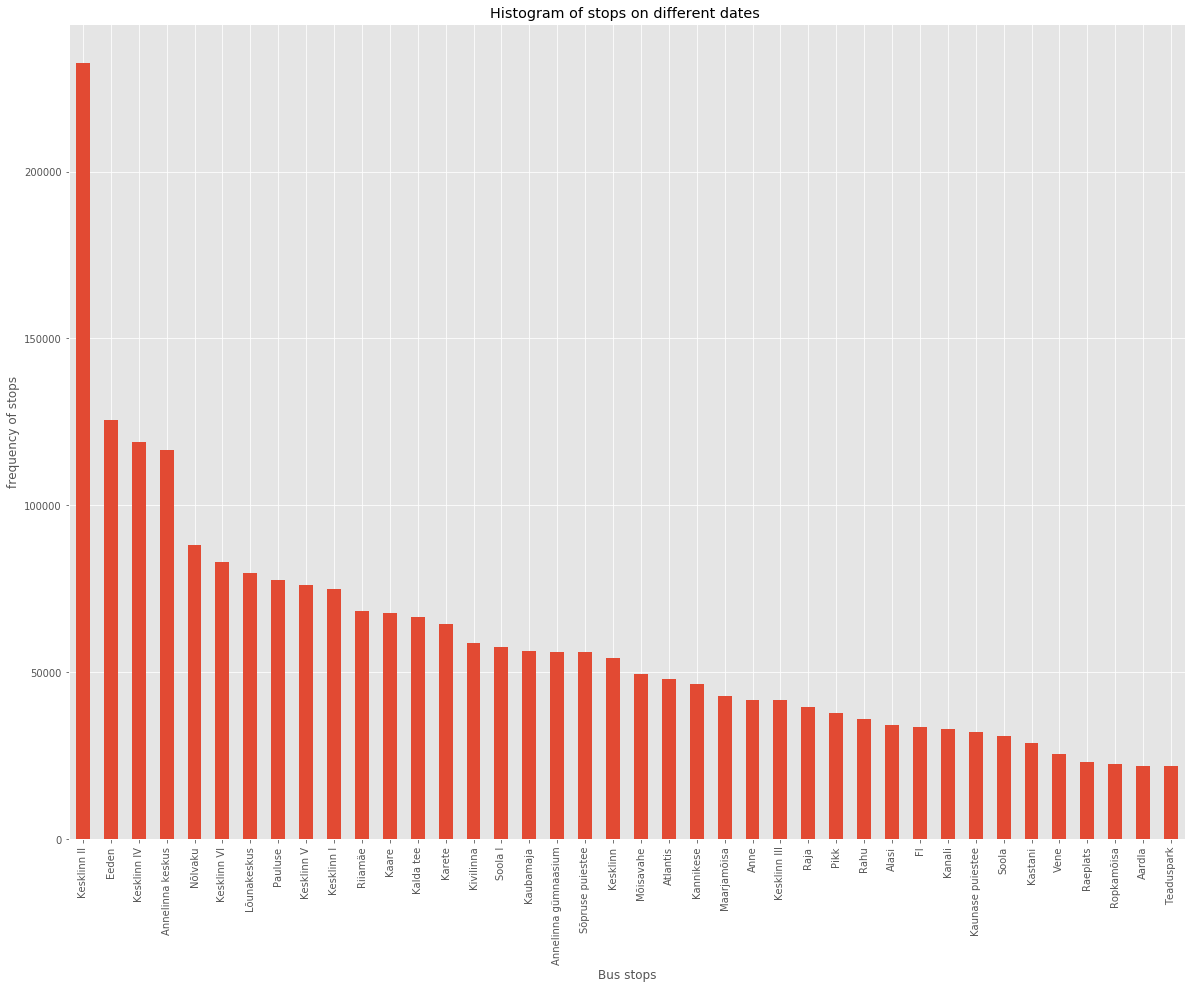

In [18]:
# visualizing bus data

plt.figure(figsize=(20,15))

all_bus_validation_copy['Stop'].value_counts()[:40].plot(kind="bar")

plt.xlabel('Bus stops')
plt.ylabel('frequency of stops')
plt.title('Histogram of stops on different dates ')

#rcParams["savefig.jpeg_quality"] = 95

#plt.savefig("/home/nash/Desktop/IDS/IDS_project/frequency of bike usage.png", dpi=200)


# Histogram of stops throughout the data

Text(0.5, 1.0, 'Histogram of stops throughout the data ')

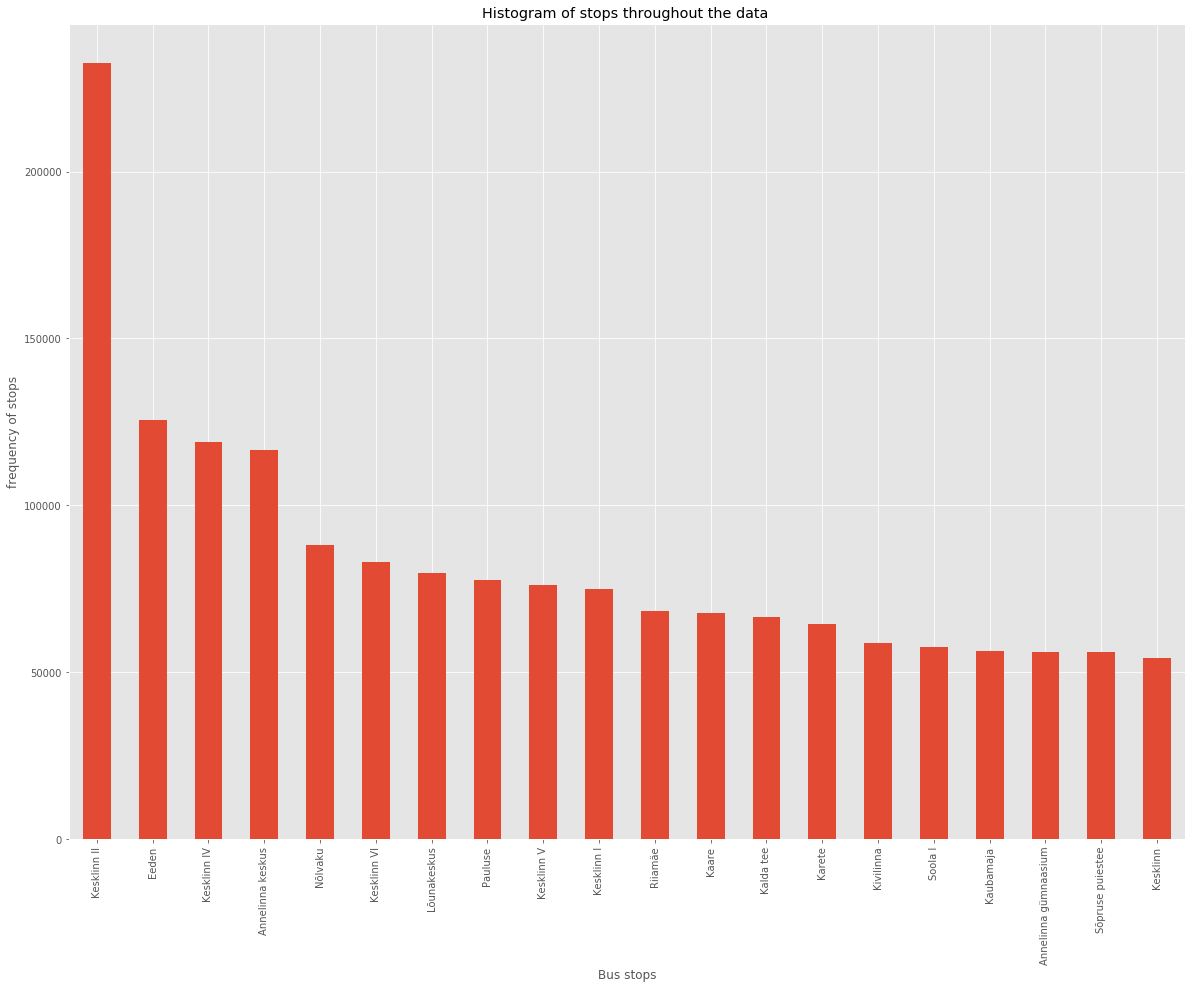

In [19]:
# 20 top bustops throughout the data

top_bus_stops = all_bus_validation_copy['Stop'].value_counts()



plt.figure(figsize=(20,15))
top_bus_stops[:20].head(20).plot(kind="bar")



plt.xlabel('Bus stops')
plt.ylabel('frequency of stops')
plt.title('Histogram of stops throughout the data ')


# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_stops_throughout_the_data.png", dpi=200)


In [22]:
# all_bus_validation_copy = all_bus_validation_copy.drop(['Direction'], axis=1)


In [23]:
all_bus_validation_copy

,Line,Time,Product Name,Product ID,Stop,Passengers
1,1,2019-06-01 06:48:48,Single ticket,6048,Nõlvaku,1
2,3,2019-06-01 07:01:37,Single ticket,6048,Nõlvaku,1
3,9,2019-06-01 07:13:20,Single ticket,6048,Alasi,1
4,7,2019-06-01 07:54:37,Single ticket,6048,Kvissentali,1
5,20,2019-06-01 07:21:56,Single ticket,6048,Kesklinn,1
...,...,...,...,...,...,...
3395055,1,2019-10-01 00:12:34,Tartu 30 day e-ticket,6053,Kesklinn II,1
3395056,1,2019-10-01 00:12:35,Student and pensioner in Tartu 30 day e-discou...,6088,Kesklinn II,1
3395057,4,2019-10-01 00:14:49,Tartu 30-day e-discount ticket for student and...,6092,Kabeli,1
3395058,1,2019-10-01 00:16:29,Tartu 30-day e-discount ticket for student and...,6092,Kesklinn IV,1


In [24]:
all_bus_validation_copy.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395059 entries, 1 to 3395059
Data columns (total 6 columns):
Line            object
Time            object
Product Name    object
Product ID      object
Stop            object
Passengers      object
dtypes: object(6)
memory usage: 181.3+ MB


In [25]:
# converting all columns to appropriate dtypes

all_bus_validation_copy['Line'] = all_bus_validation_copy['Line'].astype('category')
all_bus_validation_copy['Product Name'] = all_bus_validation_copy['Product Name'].astype('category')
all_bus_validation_copy['Product ID'] = all_bus_validation_copy['Product ID'].astype('category')
all_bus_validation_copy['Stop'] = all_bus_validation_copy['Stop'].astype('category')
all_bus_validation_copy['Passengers'] = pd.to_numeric(all_bus_validation_copy['Passengers'],errors='coerce')



all_bus_validation_copy['Time'] = pd.to_datetime(all_bus_validation_copy['Time'], dayfirst=False,
                                                 format='%Y-%m-%d %H:%M:%S', utc=False, errors='coerce')


all_bus_validation_copy.set_index('Time', inplace=True)

all_bus_validation_copy = all_bus_validation_copy.sort_values('Time')




# Histogram of stops from 16 to 19

Text(0.5, 1.0, 'Histogram of stops throughout the data around metalica days 16 to 19')

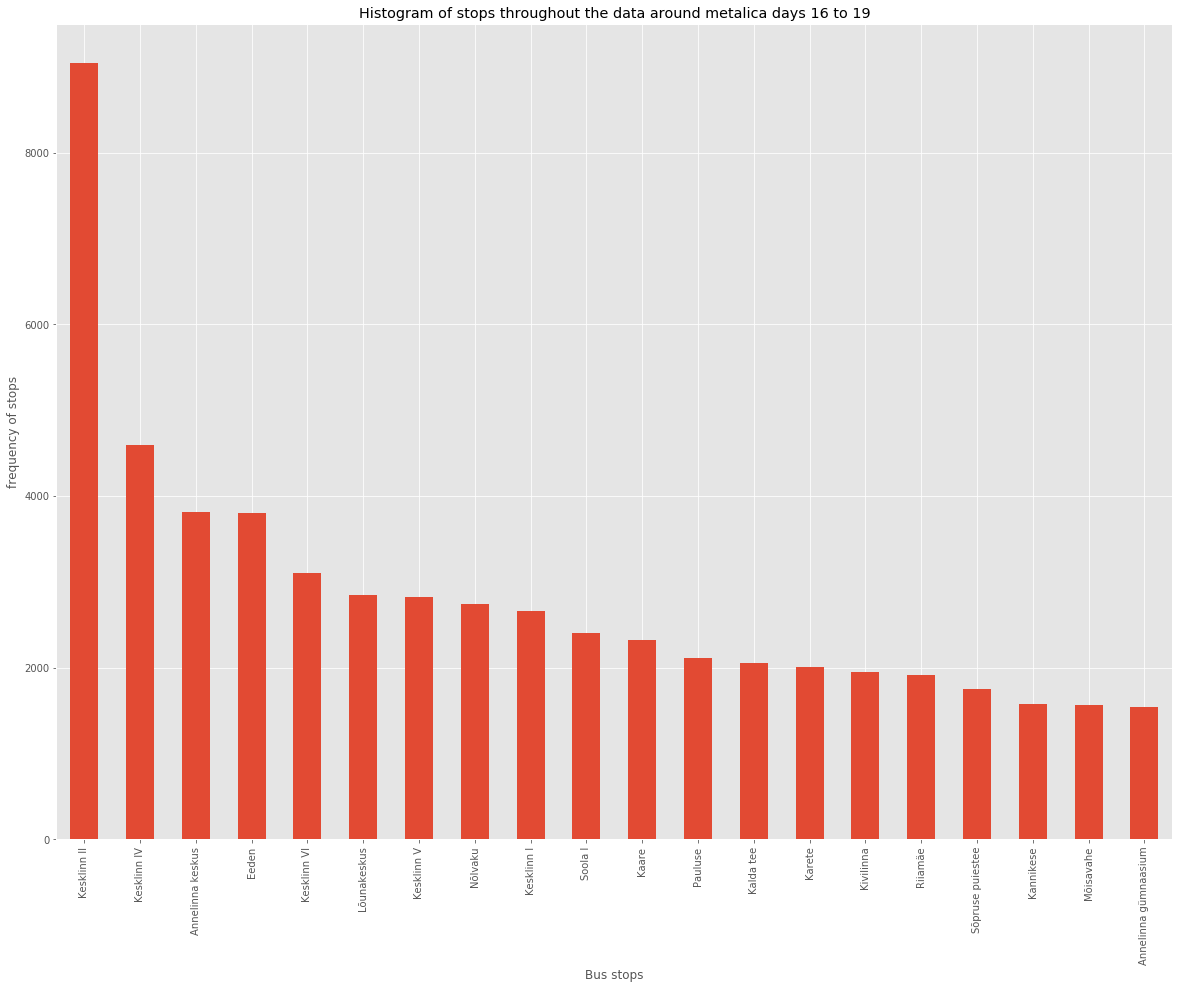

In [27]:
#  bus traffics From = '2019-07-16' To   = '2019-07-19'

# Slice the Data
From = '2019-07-16'
To   = '2019-07-19'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

topBusStops = metallica_bus_val['Stop'].value_counts()

plt.figure(figsize=(20,15))
topBusStops[:20].head(20).plot(kind="bar")

plt.xlabel('Bus stops')
plt.ylabel('frequency of stops')
plt.title('Histogram of stops throughout the data around metalica days 16 to 19')


# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_stops_From 2019-07-16 To 2019-07-19.png", dpi=200)


# Exploring ticket types usage

In [ ]:
metallica_start = metallica_route['startstationname'].value_counts()
# #MetallicaBusStops = metallica_bus_val['Stop'].value_counts()
# metallica_start.head()


In [28]:
From = '2019-07-01'
To   = '2019-07-16'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

MetallicaTicket = metallica_bus_val['Product Name'].value_counts()

plt.figure(figsize=(20,15))
MetallicaTicket[:20].head(10)

Tartu eaka tasuta pilet                                             113363
Tartu 90-day e-ticket                                                60209
Tartu 30-day e-discount ticket for student and severely disabled     56828
Tartu 30 day e-ticket                                                55745
Single ticket from Tartu Validator                                   32781
Student and pensioner in Tartu 30 day e-discount ticket              26822
Tartu single ticket from validator                                   11913
Tartu free ticket                                                     6702
Take a bus ticket from the bus driver                                 6268
Tartu 10 days e-ticket                                                3513
Name: Product Name, dtype: int64

<Figure size 1440x1080 with 0 Axes>

# Rank of ticket purchase 2 weeks before metallica

### (1)  Free ticket for the earderly people  (Tartu eaka tasuta pilet) -  113,363 tickets validation

### (2) Tartu 90-day e-ticket  60,209 tickets validation

### (3) Tartu 30-day e-discount ticket for student and severely disabled     56,828 tickets validation

### (4) Tartu 30 day e-ticket   55745 tickets validation

### (5) Single ticket from Tartu Validator                32,781 tickets validation
 
 
 ## Further detail below
 
 Tartu eaka tasuta pilet                                             113363
 
Tartu 90-day e-ticket                                                60209

Tartu 30-day e-discount ticket for student and severely disabled     56828

Tartu 30 day e-ticket                                                55745

Single ticket from Tartu Validator                                   32781

Student and pensioner in Tartu 30 day e-discount ticket              26822

Tartu single ticket from validator                                   11913

Tartu free ticket                                                     6702

Take a bus ticket from the bus driver                                 6268

Tartu 10 days e-ticket                                                3513



Text(0.5, 1.0, 'Histogram of ticket type')

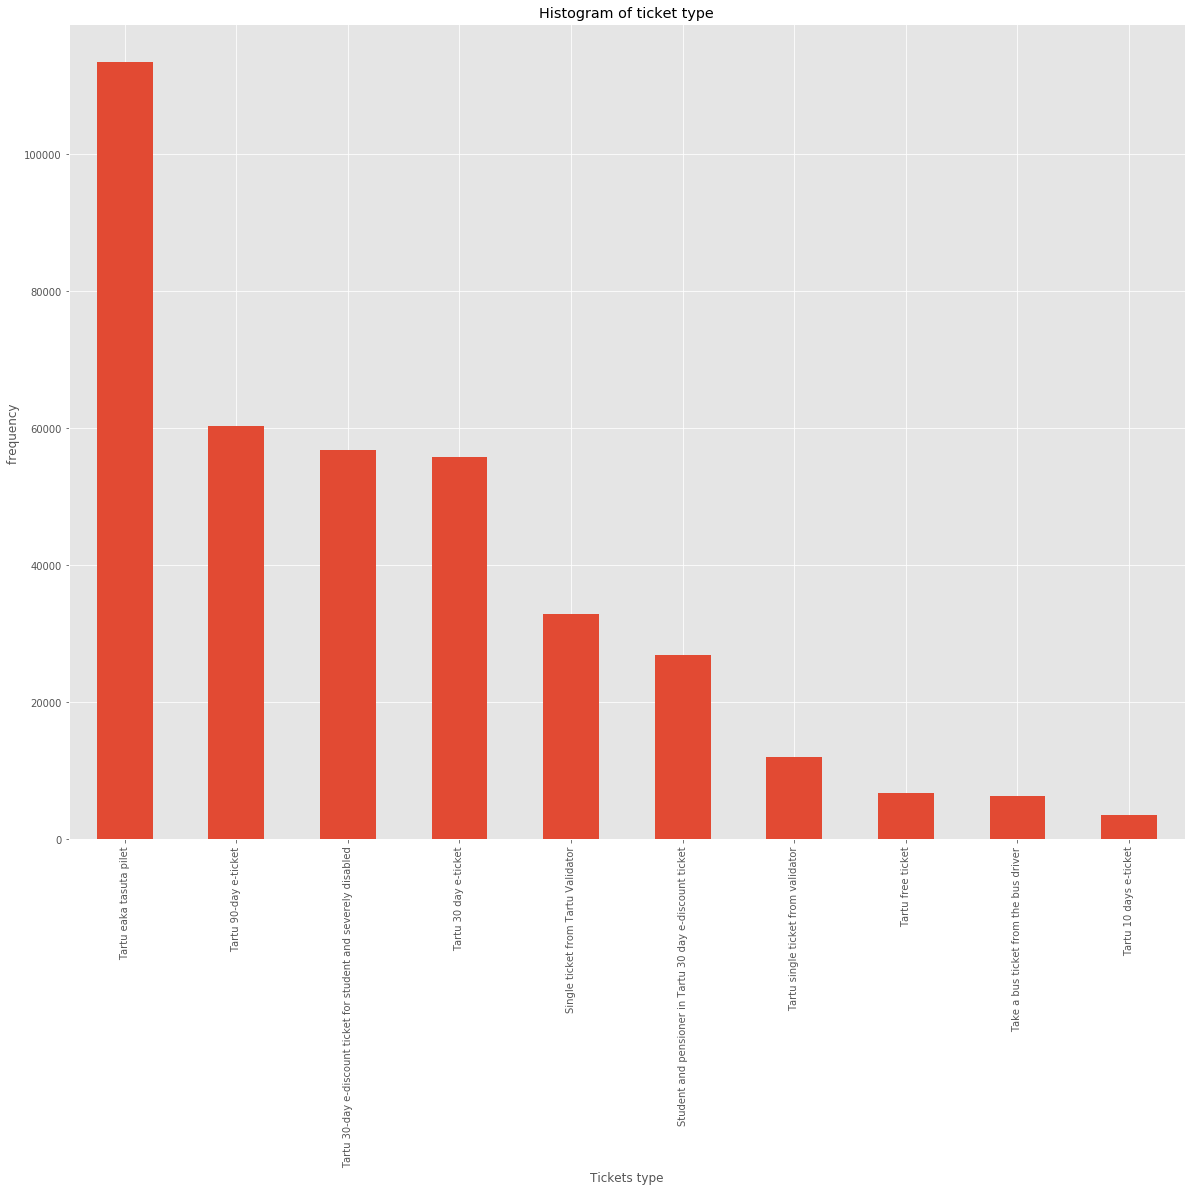

In [29]:
# visualizing bus data,  Product Name (Ticket types) 2 weeks before metallica

#####################################


From = '2019-07-01'
To   = '2019-07-16'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

MetallicaTicket = metallica_bus_val['Product Name'].value_counts()

plt.figure(figsize=(20,15))
MetallicaTicket[:20].head(10).plot(kind="bar")

plt.xlabel('Tickets type')
plt.ylabel('frequency ')
plt.title('Histogram of ticket type')
# #####################################

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram of ticket type before metallica.png", dpi=200)


Text(0.5, 1.0, 'Histogram of ticket type after metallica')

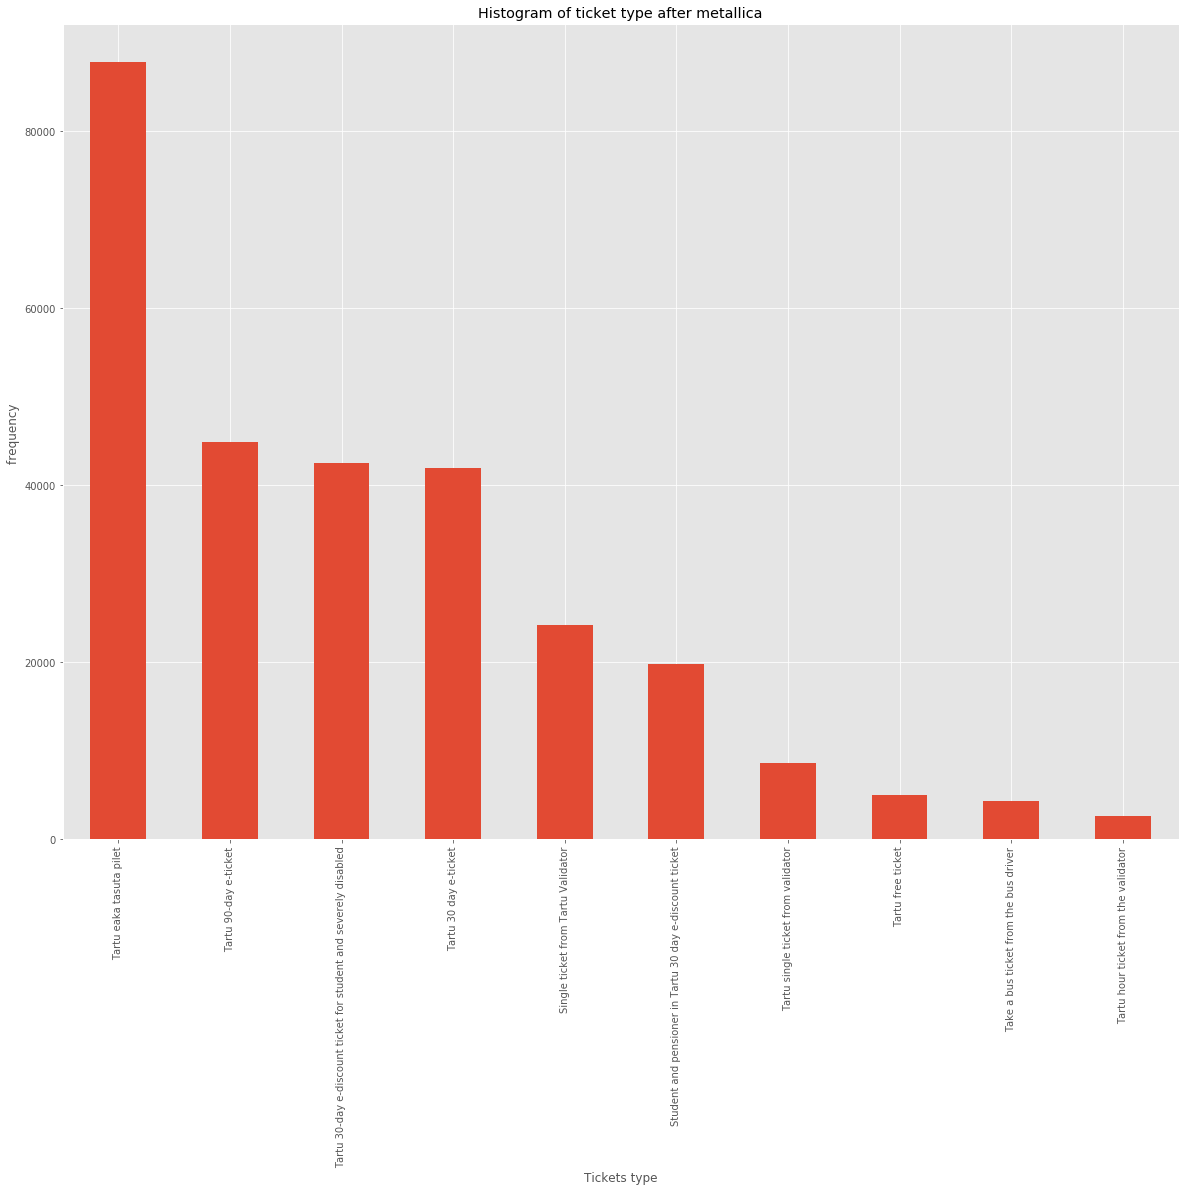

In [30]:
# visualizing bus data,  Product Name (Ticket types) 2 weeks after metaalica


From = '2019-07-19'
To   = '2019-07-31'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

Metallica_Ticket_after = metallica_bus_val['Product Name'].value_counts()

plt.figure(figsize=(20,15))
Metallica_Ticket_after[:20].head(10).plot(kind="bar")

Metallica_Ticket_after[:20].head(10).plot(kind="bar")

plt.xlabel('Tickets type')
plt.ylabel('frequency ')
plt.title('Histogram of ticket type after metallica')
# #####################################

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram of ticket type after metallica.png", dpi=200)


# Rank of ticket purchase/validation 2 weeks after metallica

### (1)  Free ticket for the earderly people  (Tartu eaka tasuta pilet) -  87774 tickets validation

### (2) Tartu 90-day e-ticket  44,842 tickets validation

### (3) Tartu 30-day e-discount ticket for student and severely disabled     42,508 tickets validation

### (4) Tartu 30 day e-ticket   41,968 tickets validation

### (5) Single ticket from Tartu Validator                24,153 tickets validation
 
 
 ## Further detail below
 Tartu eaka tasuta pilet                                                              87774
 
Tartu 90-day e-ticket                                                                44842

Tartu 30-day e-discount ticket for student and severely disabled                     42508

Tartu 30 day e-ticket                                                                41968

Single ticket from Tartu Validator                                                   24153

Student and pensioner in Tartu 30 day e-discount ticket                              19789

Tartu single ticket from validator                                                    8585

Tartu free ticket                                                                     4957

Take a bus ticket from the bus driver                                                 4322

Tartu hour ticket from the validator                                                  2538

Tartu 10 days e-ticket                                                                2493

Free ticket with Tartu escort                                                         1803

Tartu 10-day e-discount ticket (study, student, sworn pension, severe disability)      939

Tartu discounted hour ticket for pupils and students                                   871

Free ticket from the validator                                                         614

Take an hour sõbra pilet                                                               309

Tartu daily ticket from the Validator                                                  303

one-hour QR ticket                                                                     143

one hour ticket for 2 friends                                                           81

Free ticket                                                                             80

Tartu ühe tunni 3 sõbra pilet                                                            6

Tartu discounted daily ticket from the validator                                         4

one hour ticket from 5 friends                                                           0

Tartu e-discount day ticket                                                              0

Tartu e-ticket                                                                           0

Toote nimetus                                                                            0

Single validator ticket                                                                  0

Validator discount unit ticket                                                           0

Single ticket                                                                            0

Hour tickets                                                                             0

one hour ticket from 4 friends                                                           0

Discount hour ticket                                                                     0



# Vizualization of ticket purchase and vallidation on metallica day

In [31]:
all_bus_validation_copy

,Line,Product Name,Product ID,Stop,Passengers
Time,,,,,
2019-06-01 04:20:24,21,Tartu 90-day e-ticket,6086,Soola,1.0
2019-06-01 04:20:35,21,Single validator ticket,6050,Soola,1.0
2019-06-01 04:28:27,21,Single validator ticket,6050,Autokeskus,1.0
2019-06-01 04:41:59,21,Tartu eaka tasuta pilet,6276,Kannikese,1.0
2019-06-01 04:52:22,21,Tartu 10 days e-ticket,6052,Tervishoiu,1.0
...,...,...,...,...,...
NaT,Liin,Toote nimetus,Toote ID,Peatus,NaN
NaT,Liin,Toote nimetus,Toote ID,Peatus,NaN
NaT,Liin,Toote nimetus,Toote ID,Peatus,NaN


Text(0.5, 1.0, 'Histogram of ticket type during metallica')

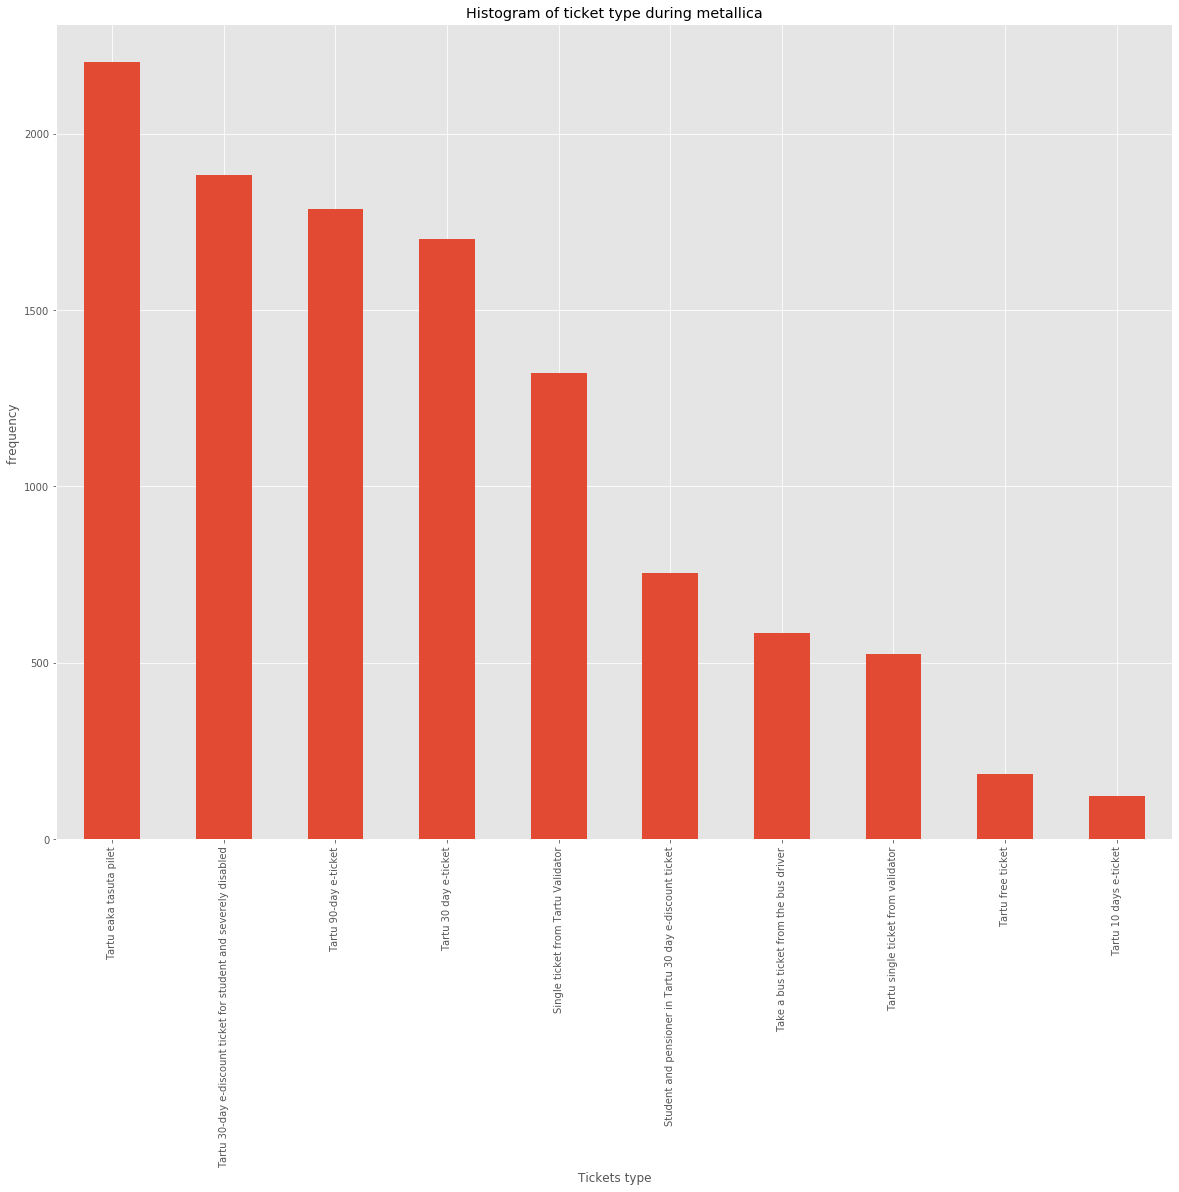

In [32]:
# visualizing bus data,  Product Name (Ticket types) during metallica concert day


From = '2019-07-18 15:00:00'
To   = '2019-07-18 23:59:00'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

Metallica_Ticket_during = metallica_bus_val['Product Name'].value_counts()
Metallica_Ticket_during
plt.figure(figsize=(20,15))
Metallica_Ticket_during[:20].head(10).plot(kind="bar")

Metallica_Ticket_during[:20].head(10).plot(kind="bar")

plt.xlabel('Tickets type')
plt.ylabel('frequency ')
plt.title('Histogram of ticket type during metallica')
# # #####################################

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram of ticket type during metallica.png", dpi=200)


In [33]:
# visualizing bus data,  stops during metallica concert day


From = '2019-07-18 15:00:00'
To   = '2019-07-18 23:59:00'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

Metallica_Ticket_during = metallica_bus_val['Stop'].value_counts()
Metallica_Ticket_during.head(15)
# plt.figure(figsize=(20,15))
# Metallica_Ticket_after[:20].head(10).plot(kind="bar")

# Metallica_Ticket_after[:20].head(10).plot(kind="bar")

# plt.xlabel('Tickets type')
# plt.ylabel('frequency ')
# plt.title('Histogram of ticket type after metallica')
# # #####################################

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram of ticket type after metallica.png", dpi=200)


Kesklinn II         1161
Lõunakeskus          491
Kesklinn IV          424
Eeden                405
Annelinna keskus     350
Kesklinn I           334
Pauluse              312
Kesklinn VI          309
Kesklinn V           301
Kaare                290
Soola I              257
Kesklinn III         220
Riiamäe              215
Soola                203
Karete               200
Name: Stop, dtype: int64

## The pattern of ticket validation remain relatively unchanged even on metallica day
# AND
## most bus traffic was towards the down tow district as usual

# Histogram of stops on metallica day

Text(0.5, 1.0, 'Histogram of stops during metallica days')

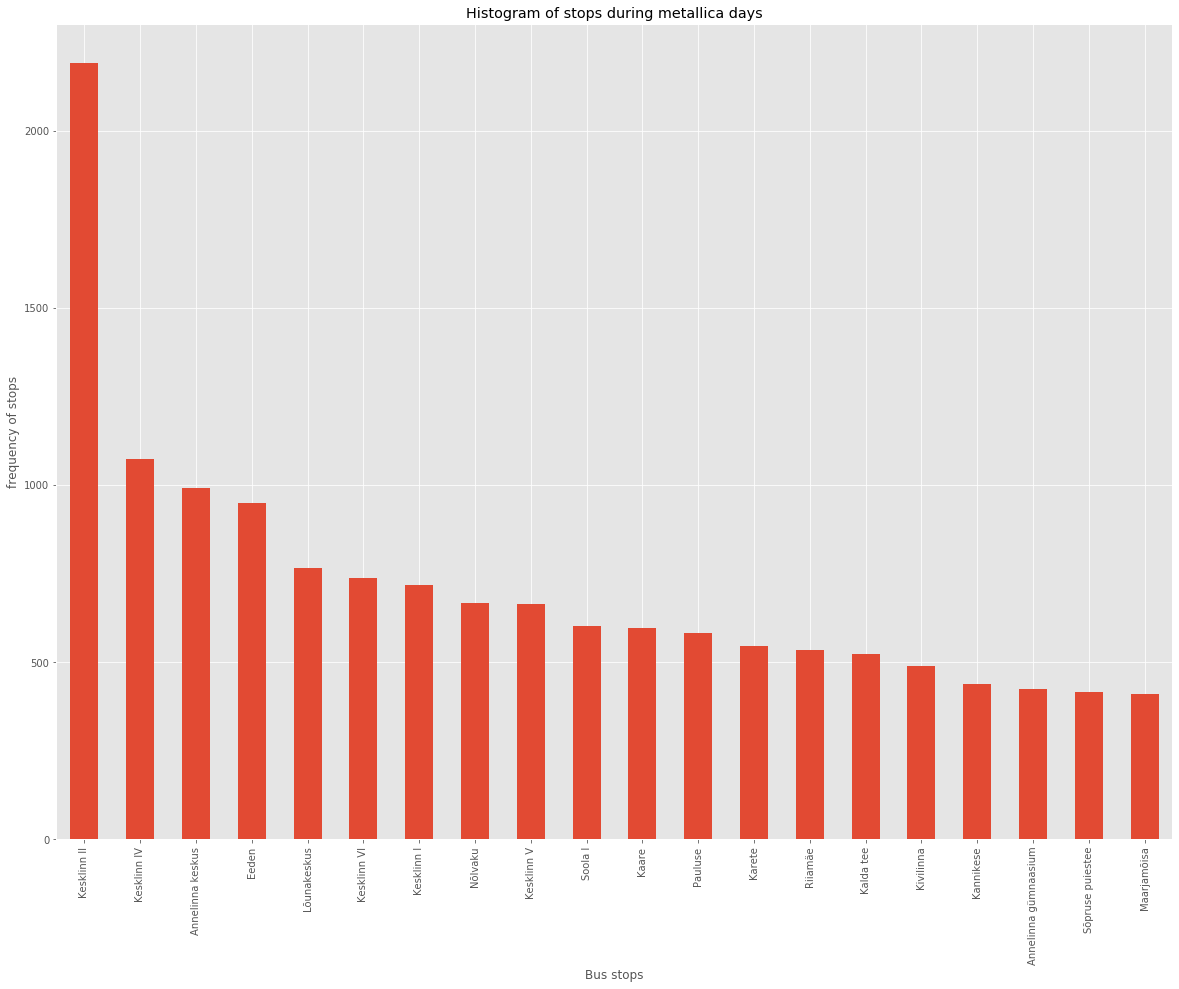

In [34]:
#  bus traffics From = '2019-07-16' To   = '2019-07-19'

# Slice the Data
From = '2019-07-18'
To   = '2019-07-18'
metallica_bus_val = all_bus_validation_copy.loc[From:To,:]

MetallicaBusStops = metallica_bus_val['Stop'].value_counts()

plt.figure(figsize=(20,15))
MetallicaBusStops[:20].head(20).plot(kind="bar")

plt.xlabel('Bus stops')
plt.ylabel('frequency of stops')
plt.title('Histogram of stops during metallica days')


#plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram of stops during metallica days 17 to 18.png", dpi=200)


# From observation there wasn't  drastic increase nor decrease in Bus transportation during metallica concert.


# The mean bus usage was relatively constant weeks before, during and after metallica concert in tartu.

#  therefore we can prematurely conclude that metallica concert has relative no effect on bus usage.


In [35]:
## # all bus station around tartu metropolis

unique_stops_array = all_bus_validation_copy["Stop"].unique()
unique_stops_list = unique_stops_array.tolist()

df = pd.DataFrame(data=unique_stops_list, index=None)
df[0]#.head(20)

0                     Soola
1                Autokeskus
2                 Kannikese
3                Tervishoiu
4      Annelinna gümnaasium
               ...         
234                   Lille
235              Linnupargi
236             Vabadussild
237                 Saekoja
238                  Peatus
Name: 0, Length: 239, dtype: object

## There are 240 tops in Tartu Metropolis

# WORKING WITH  LOCATION DATA


## visualizing the location  data

In [36]:


all_location_data.dtypes
# all_location_data

Unnamed: 0       int64
route_code       int64
cyclenumber      int64
latitude       float64
longitude      float64
coord_date      object
coord_time      object
dtype: object

In [37]:
all_location_data['route_code'] = all_location_data['route_code'].astype('category')
all_location_data['cyclenumber'] = all_location_data['cyclenumber'].astype('category')
# all_location_data = all_location_data.drop('Unnamed: 0', axis=1)



all_location_data['coord_date'] = pd.to_datetime(all_location_data['coord_date'], dayfirst=False,
                                                 format='%Y-%m-%d', errors='coerce')





all_location_data['coord_time'] = pd.to_datetime(all_location_data['coord_time'], dayfirst=False,
                                                 format='%H:%M:%S', utc=True, errors='coerce')



# all_bus_validation_copy.set_index('Time', inplace=True)

# all_bus_validation_copy = all_bus_validation_copy.sort_values('Time')



In [38]:
all_location_data.dtypes

Unnamed: 0                   int64
route_code                category
cyclenumber               category
latitude                   float64
longitude                  float64
coord_date          datetime64[ns]
coord_time     datetime64[ns, UTC]
dtype: object

In [39]:
all_location_data['coord_time'].describe()

count                          6985
unique                         6507
top       1900-01-01 15:36:38+00:00
freq                              4
first     1900-01-01 00:00:09+00:00
last      1900-01-01 23:59:59+00:00
Name: coord_time, dtype: object

In [40]:
all_location_data

,Unnamed: 0,route_code,cyclenumber,latitude,longitude,coord_date,coord_time
0,0,1560855535690,2450,58.361152,26.771542,2019-06-18,NaT
1,1,1560855535690,2450,58.359850,26.769987,2019-06-18,NaT
2,2,1560855535690,2450,58.359698,26.769787,2019-06-18,NaT
3,3,1560855535690,2450,58.359553,26.769590,2019-06-18,NaT
4,4,1560855535690,2450,58.359327,26.769295,2019-06-18,NaT
...,...,...,...,...,...,...,...
2325730,361872,1564174794251,2672,58.372078,26.761890,2019-07-27,NaT
2325731,361873,1564174794251,2672,58.371920,26.763128,2019-07-27,NaT
2325732,361874,1564174794251,2672,58.371882,26.763348,2019-07-27,NaT
2325733,361875,1564174794251,2672,58.371847,26.763585,2019-07-27,NaT


In [42]:

all_location_data.dtypes

Unnamed: 0                   int64
route_code                category
cyclenumber               category
latitude                   float64
longitude                  float64
coord_date          datetime64[ns]
coord_time     datetime64[ns, UTC]
dtype: object

In [43]:
all_location_data.to_csv('/home/nash/Desktop/IDS/IDS_project/IDS2019_project_team_M15_data/clean_location_data.csv')


Text(0.5, 1.0, 'Histogram of days with frequency of bike usage on different dates ')

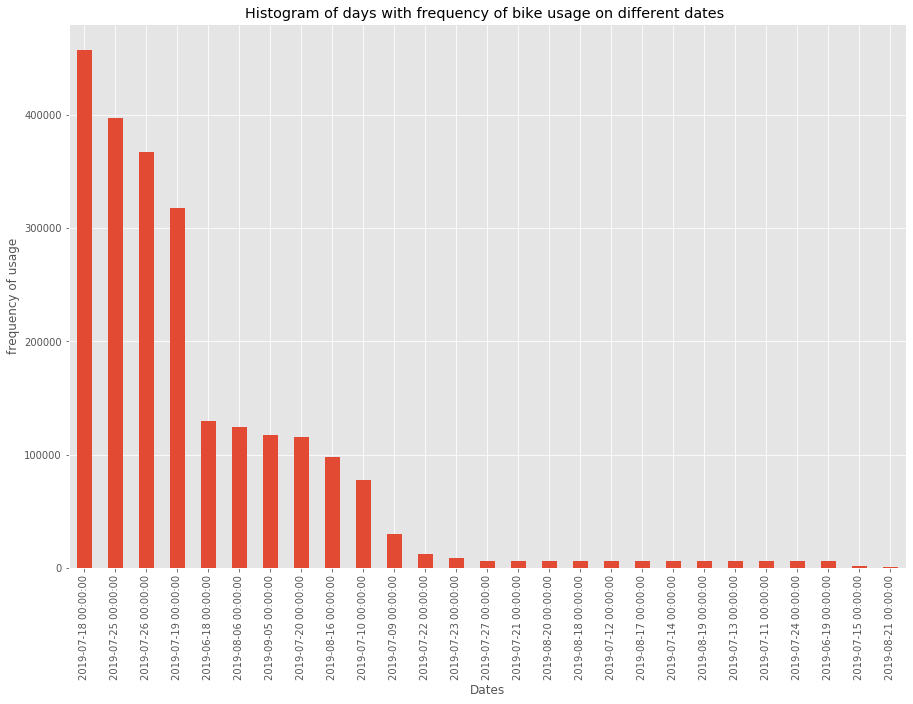

In [44]:
# frequency minning from date, i.e what ws the busiest date

plt.figure(figsize=(15,10))

all_location_data['coord_date'].value_counts().plot(kind="bar")


plt.xlabel('Dates')
plt.ylabel('frequency of usage')
plt.title('Histogram of days with frequency of bike usage on different dates ')

#rcParams["savefig.jpeg_quality"] = 95

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/frequency of bike usage.png", dpi=200)


In [100]:
all_route_data_copy3 = all_route_data.copy(deep=True)

In [101]:
all_route_data_copy4 = all_route_data.copy(deep=True)

In [102]:
all_route_data_copy2 = all_route_data.copy(deep=True)

In [62]:
# data cleaning, removing unwanted columns for route data

all_route_data_copy = all_route_data.copy(deep=True)



,Unnamed: 0,route_code,cyclenumber,unlockedat,unlockedattime,lockedat,lockedattime,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
0,0,1559465761445,90417.0,2019-06-02,11:56:01,2019-06-02,11:58:37,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
1,1,1559486513829,90461.0,2019-06-02,17:41:53,2019-06-02,17:43:10,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2,2,1559549988096,2058.0,2019-06-03,11:19:48,2019-06-03,12:30:41,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
3,3,1559555230815,2421.0,2019-06-03,12:47:10,2019-06-03,12:53:28,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
4,4,1559555553023,2359.0,2019-06-03,12:52:33,2019-06-03,12:54:08,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


In [66]:
all_route_data_copy.head()

,route_code,cyclenumber,unlockedat,unlockedattime,lockedat,lockedattime,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
0,1559465761445,90417.0,2019-06-02,11:56:01,2019-06-02,11:58:37,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
1,1559486513829,90461.0,2019-06-02,17:41:53,2019-06-02,17:43:10,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2,1559549988096,2058.0,2019-06-03,11:19:48,2019-06-03,12:30:41,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
3,1559555230815,2421.0,2019-06-03,12:47:10,2019-06-03,12:53:28,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
4,1559555553023,2359.0,2019-06-03,12:52:33,2019-06-03,12:54:08,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


In [65]:
all_route_data_copy = all_route_data_copy.drop(labels='Unnamed: 0', axis=1)


In [67]:
# converting categorical values

all_route_data_copy['route_code'] = all_route_data_copy['route_code'].astype('category')
all_route_data_copy['cyclenumber'] = all_route_data_copy['cyclenumber'].astype('category')
all_route_data_copy['CycleType'] = all_route_data_copy['CycleType'].astype('category')


In [71]:
all_route_data_copy['unlockedat'] = pd.to_datetime(all_route_data['unlockedat'], 
                                                   format='%Y-%m-%d', utc=True, errors='coerce')


all_route_data['lockedat'] = pd.to_datetime(all_route_data['lockedat'], format='%Y-%m-%d')

all_route_data_copy['unlockedattime'] = pd.to_datetime(all_route_data['unlockedat'], 
                                                   format='%H:%M:%S', errors='coerce')


all_route_data_copy['lockedattime'] = pd.to_datetime(all_route_data['lockedattime'], 
                                                   format='%H:%M:%S', errors='coerce')



In [72]:
all_route_data.dtypes

Unnamed: 0                   int64
route_code                category
cyclenumber               category
unlockedat          datetime64[ns]
unlockedattime              object
lockedat            datetime64[ns]
lockedattime                object
startstationname            object
endstationname              object
rfidnumber                  object
length                     float64
DurationMinutes            float64
CycleType                 category
costs                      float64
Membership                  object
dtype: object

In [73]:
# #all_route_data_copy['lockedattime'] = pd.to_datetime(all_route_data_copy['lockedattime'], format='%H:%M:%S', utc=True, errors='coerce')
# all_route_data_copy['unlockedattime'] = pd.to_datetime(all_route_data_copy['unlockedattime'], format='%Y-%m-%d %H:%M:%S', utc=True, errors='coerce')



# #route.to_csv(index=False)


# ### setting date and time as index for the data

all_route_data_copy.set_index('unlockedat', inplace=True)
all_route_data_copy.set_index('lockedat', inplace=True)
all_route_data_copy.set_index('lockedattime', inplace=True)
all_route_data_copy.set_index('unlockedattime', inplace=True)

# all_bus_validation_copy = all_bus_validation_copy.sort_values('Time')

all_route_data.dtypes

Unnamed: 0                   int64
route_code                category
cyclenumber               category
unlockedat          datetime64[ns]
unlockedattime              object
lockedat            datetime64[ns]
lockedattime                object
startstationname            object
endstationname              object
rfidnumber                  object
length                     float64
DurationMinutes            float64
CycleType                 category
costs                      float64
Membership                  object
dtype: object

In [74]:
all_route_data_copy

,route_code,cyclenumber,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
unlockedattime,,,,,,,,,,
2019-06-02,1559465761445,90417.0,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
2019-06-02,1559486513829,90461.0,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2019-06-03,1559549988096,2058.0,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
2019-06-03,1559555230815,2421.0,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
2019-06-03,1559555553023,2359.0,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership
...,...,...,...,...,...,...,...,...,...,...
2019-07-26,1564174751791,2177.0,Raatuse kool,Pargi,Mobile App,3.25,15.19,Pedelec,0.0,3 month free membership
2019-07-26,1564174765526,2315.0,Tamme puiestee,Magistri,Mobile App,4.45,22.15,Pedelec,0.0,1 Week Membership
2019-07-26,1564174782296,2529.0,Tamme puiestee,Magistri,Mobile App,4.50,22.07,Pedelec,0.0,1 Week Membership


In [75]:
all_route_data_copy = all_route_data_copy.drop('route_code', axis=1)
#all_route_data_copy = all_route_data_copy.drop('Unnamed: 0', axis=1)
all_route_data_copy = all_route_data_copy.drop('cyclenumber', axis=1)


all_route_data_copy.head()

,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
unlockedattime,,,,,,,,
2019-06-02,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
2019-06-02,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2019-06-03,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


Text(0.5, 1.0, 'Histogram of most frequent start station')

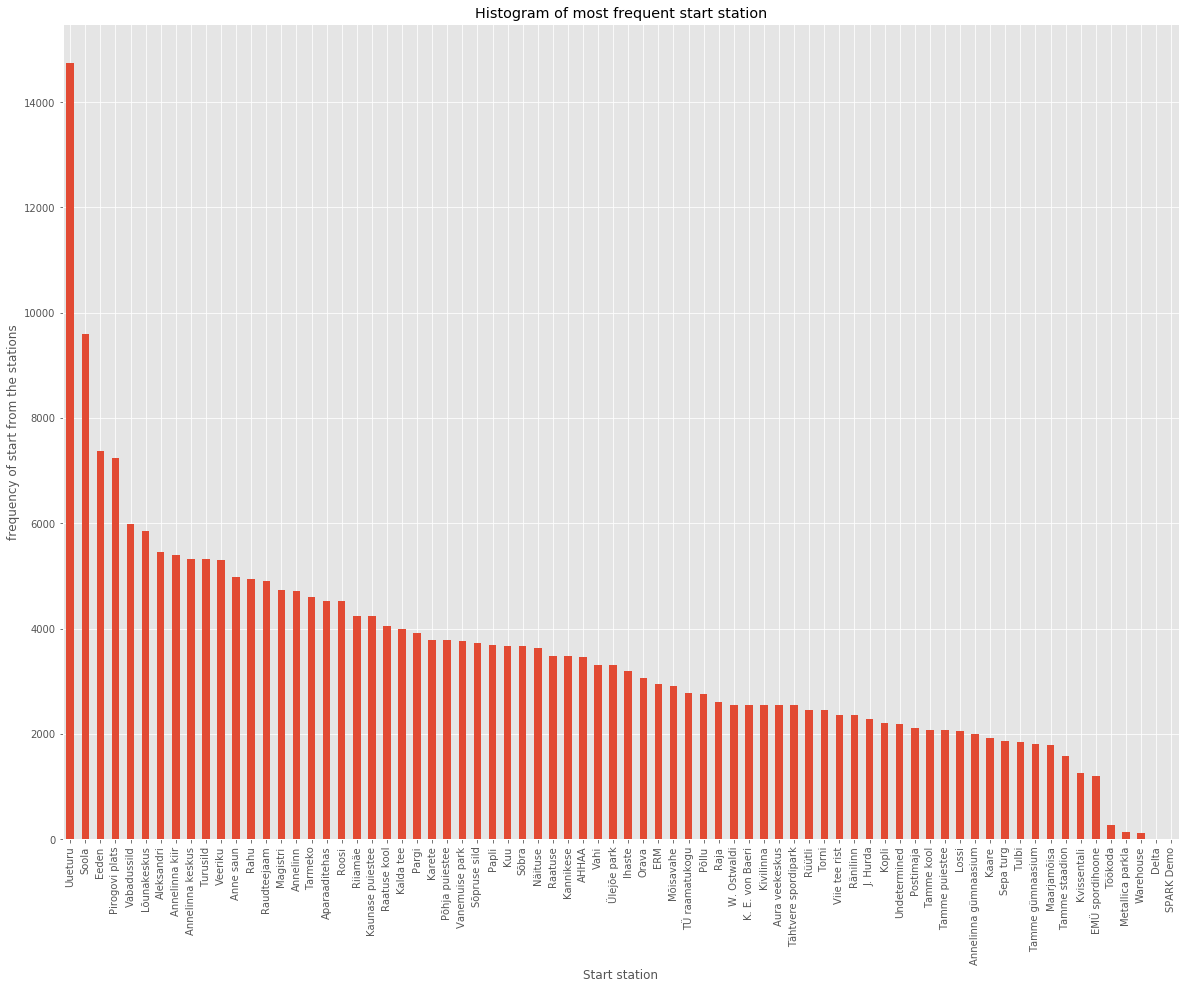

In [48]:
# frequency minning from start station 

plt.figure(figsize=(20,15))

all_route_data_copy['startstationname'].value_counts().plot(kind="bar")


plt.xlabel('Start station')
plt.ylabel('frequency of start from the stations')
plt.title('Histogram of most frequent start station')

#rcParams["savefig.jpeg_quality"] = 95

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/AAmost_frequent_start_stations.jpeg", dpi=200)


In [76]:
all_route_data_copy.head()

,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
unlockedattime,,,,,,,,
2019-06-02,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
2019-06-02,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2019-06-03,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


Text(0.5, 1.0, 'Histogram of most frequent end station')

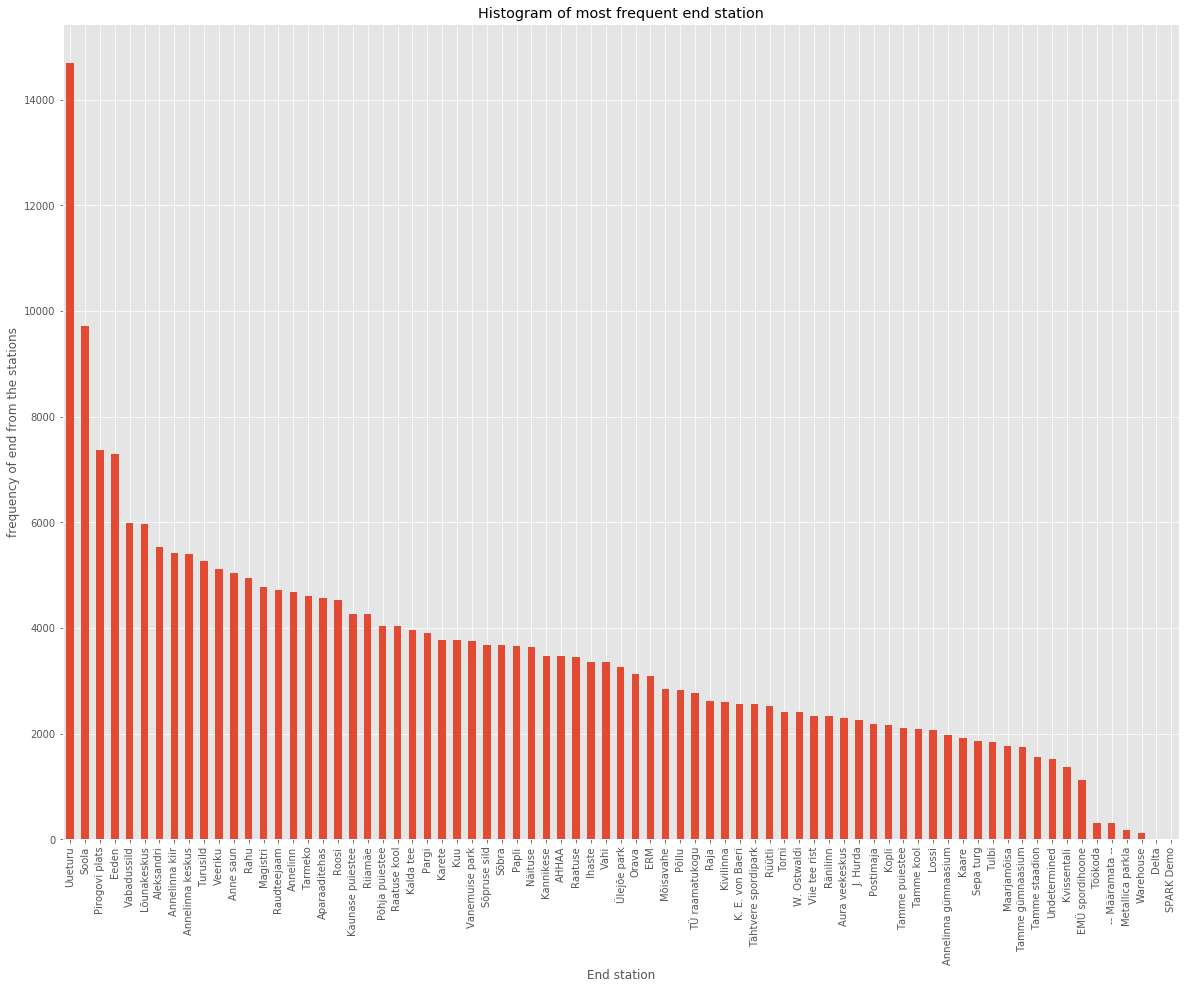

In [50]:
# frequency minning from end station 

plt.figure(figsize=(20,15))

all_route_data_copy['endstationname'].value_counts().plot(kind="bar")


plt.xlabel('End station')
plt.ylabel('frequency of end from the stations')
plt.title('Histogram of most frequent end station')

#rcParams["savefig.jpeg_quality"] = 95

# plt.savefig("/home/nash/Desktop/IDS/IDS_project/AAmost_frequent_END_stations.jpeg", dpi=1200)


In [51]:
all_route_data_copy.head()

,unlockedat,unlockedattime,lockedat,lockedattime,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
0,2019-06-02,11:56:01,2019-06-02,11:58:37,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
1,2019-06-02,17:41:53,2019-06-02,17:43:10,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2,2019-06-03,11:19:48,2019-06-03,12:30:41,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
3,2019-06-03,12:47:10,2019-06-03,12:53:28,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
4,2019-06-03,12:52:33,2019-06-03,12:54:08,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


In [77]:
all_route_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256164 entries, 2019-06-02 to 2019-07-26
Data columns (total 8 columns):
startstationname    256164 non-null object
endstationname      256164 non-null object
rfidnumber          256164 non-null object
length              256164 non-null float64
DurationMinutes     256164 non-null float64
CycleType           256164 non-null category
costs               256164 non-null float64
Membership          256164 non-null object
dtypes: category(1), float64(3), object(4)
memory usage: 15.9+ MB


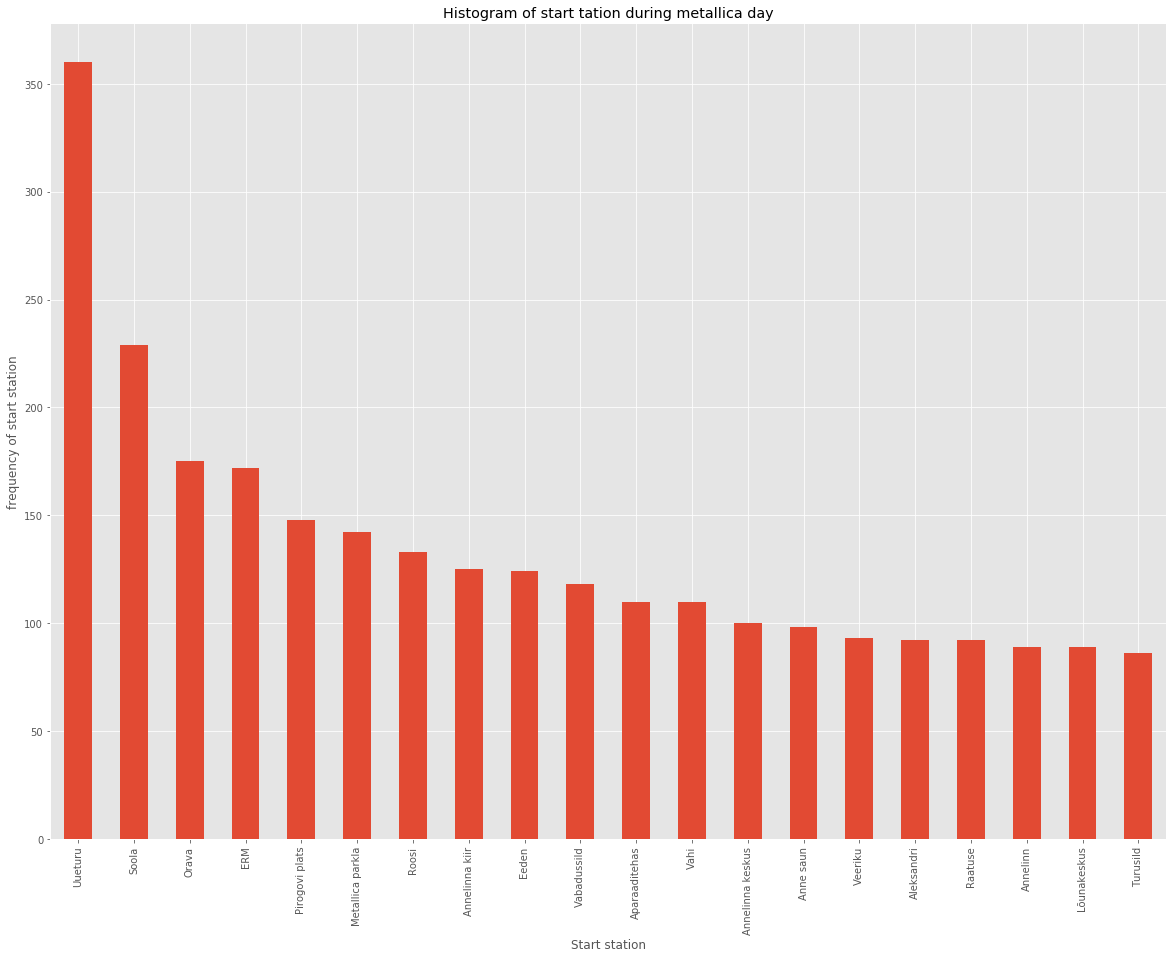

In [88]:
#  bike strt station '2019-07-18'

# Slice the Data
From = '2019-07-18'
To   = '2019-07-18'

metallica_route18 = all_route_data_copy.loc[From:To,:]
#metallica_bus_val = all_bus_validation_copy.loc[From:To,:]
metallica_route18.describe()

metallica_route18 = metallica_route18['startstationname'].value_counts()
#MetallicaBusStops = metallica_bus_val['Stop'].value_counts()
metallica_start.head()

plt.figure(figsize=(20,15))
metallica_route18[:20].head(20).plot(kind="bar")


plt.xlabel('Start station')
plt.ylabel('frequency of start station')
plt.title('Histogram of start tation during metallica day')
plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_start_station_during_metallica_day.png", dpi=200)


In [99]:
#  bike strt station '2019-07-18'

# Slice the Data
From = '2019-07-16'
To   = '2019-07-16'

metallica_route18 = all_route_data_copy.loc[From:To,:]
#metallica_bus_val = all_bus_validation_copy.loc[From:To,:]
metallica_route18.describe()

metallica_route18 = metallica_route18['startstationname'].value_counts()
#MetallicaBusStops = metallica_bus_val['Stop'].value_counts()
metallica_start.head()

plt.figure(figsize=(20,15))
metallica_route18[:20].head(20)#.plot(kind="bar")


# plt.xlabel('Start station')
# plt.ylabel('frequency of start station')
# plt.title('Histogram of start tation during metallica day')
# plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_start_station_during_metallica_day.png", dpi=200)


Series([], Name: startstationname, dtype: int64)

<Figure size 1440x1080 with 0 Axes>

# Top start bike dock station before and during metallica concert  

#### The trend of usage doesn't change even during metaliica conert even intensity of usage changed during metallica

#### even though the trffic increased during metallica concert


## .
## Uueturu (Kaubamaja center)

## Soola 

## Eeden 

## Vabadussild

## Pirogovi plats

## Veeriku

## Annelinna keskus

## Aleksandri

## Annelinna kiir

## Lõunakeskus

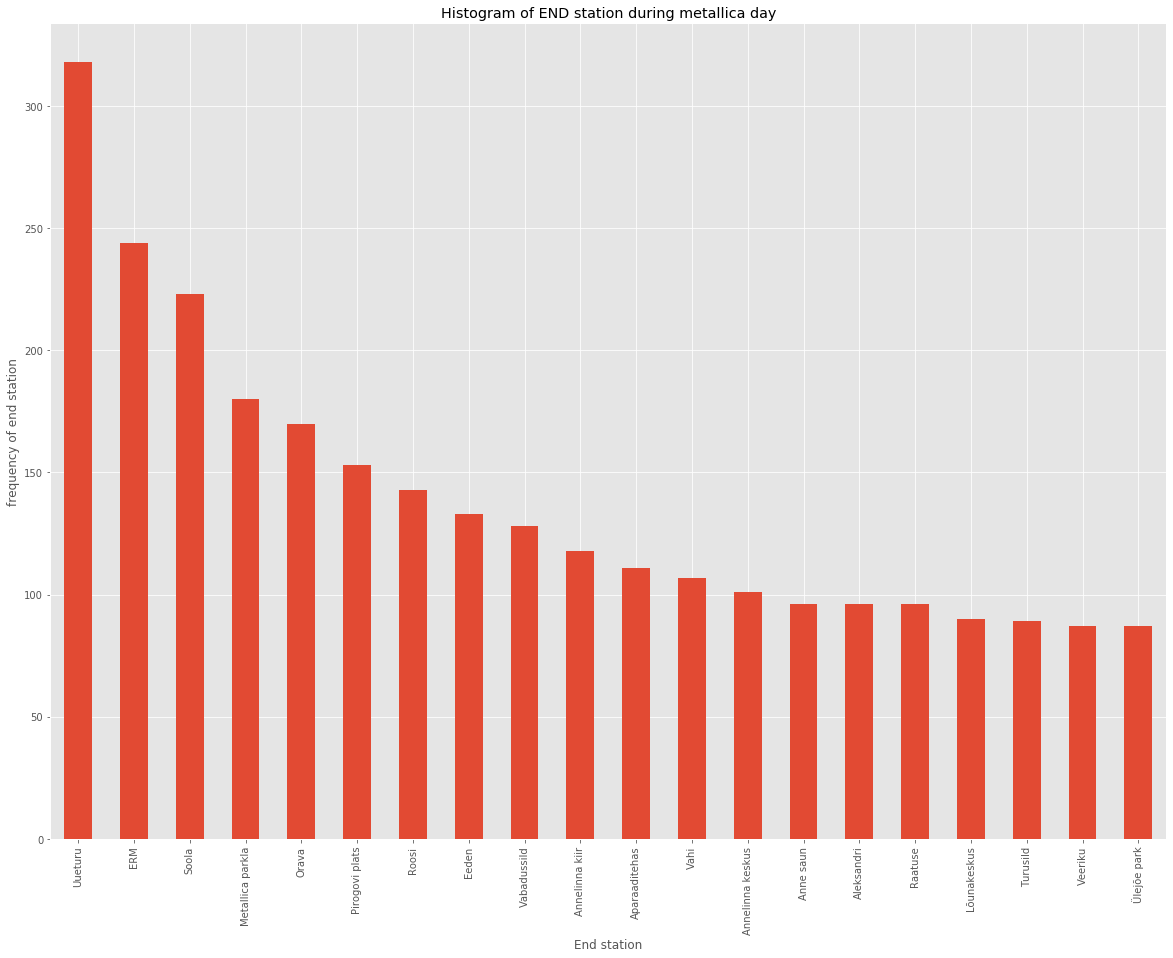

In [106]:
#  bike end station '2019-07-18'

# Slice the Data
From = '2019-07-18'
To   = '2019-07-18'

metallica_route182 = all_route_data_copy.loc[From:To,:]
#metallica_bus_val = all_bus_validation_copy.loc[From:To,:]
metallica_route18.describe()

metallica_route182 = metallica_route182['endstationname'].value_counts()
#MetallicaBusStops = metallica_bus_val['Stop'].value_counts()
#metallica_start.head()

plt.figure(figsize=(20,15))
metallica_route182[:20].head(20).plot(kind="bar")


plt.xlabel('End station')
plt.ylabel('frequency of end station')
plt.title('Histogram of END station during metallica day')
plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_END_station_during_metallica_day.png", dpi=200)


# Bike end station report from route data.


## As obviously will be expected from observations in the data, the trend of bike usage as regards end station, almost all top 10 end stations are towards docks in and around the metallica concert venue. and compared to other days where end station are pretty random.


#### Uueturu

#### ERM (Estonian National Museum)

#### Soola

#### Metallica parkla

#### Orava  (Vahi bike station)

#### Pirogovi plats

#### Roosi

#### Eeden

#### Vabadussild

#### Annelinna kiir

In [108]:
all_route_data_copy.head()

,startstationname,endstationname,rfidnumber,length,DurationMinutes,CycleType,costs,Membership
unlockedattime,,,,,,,,
2019-06-02,Warehouse,Warehouse,RFID Card,0.00,2.60,Pedelec,0.0,3-Month Free Membership
2019-06-02,Warehouse,Warehouse,RFID Card,0.06,1.27,Pedelec,0.0,3-Month Free Membership
2019-06-03,Warehouse,Warehouse,Mobile App,0.00,70.89,Pedelec,1.0,3-Month Free Membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.96,6.29,Pedelec,0.0,3 month free membership
2019-06-03,Pirogovi plats,Pirogovi plats,Mobile App,0.01,1.59,Pedelec,0.0,3-Month Free Membership


Text(0.5, 1.0, 'Histogram of activation method during metallica day')

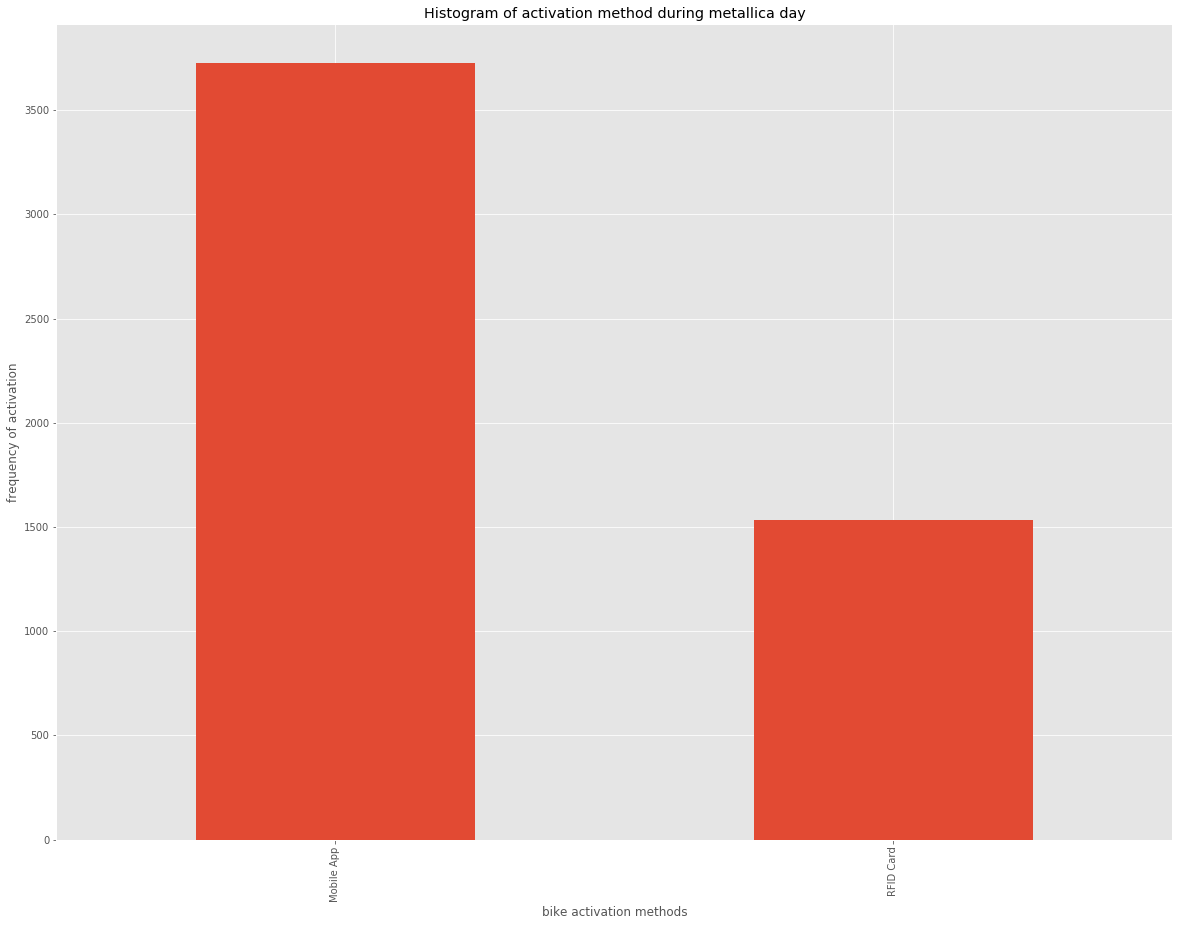

In [111]:
#  bike activation methods '2019-07-18'

# Slice the Data
From = '2019-07-18'
To   = '2019-07-18'

metallica_route182 = all_route_data_copy.loc[From:To,:]
#metallica_bus_val = all_bus_validation_copy.loc[From:To,:]
metallica_route18.describe()

metallica_route182 = metallica_route182['rfidnumber'].value_counts()
#MetallicaBusStops = metallica_bus_val['Stop'].value_counts()
metallica_route182 .head()

plt.figure(figsize=(20,15))
metallica_route182[:20].head(20).plot(kind="bar")


plt.xlabel('bike activation methods')
plt.ylabel('frequency of activation')
plt.title('Histogram of activation method during metallica day')
#plt.savefig("/home/nash/Desktop/IDS/IDS_project/Histogram_of_activation_method_during_metallica_day.png", dpi=200)


In [1]:
From = '2019-07-18'
To   = '2019-07-18'

# all_route_data_copy.loc[From:To,:].groupby(by='rfidnumber').head()


all_route_data_copy.loc[From:To,:][all_route_data_copy.loc[From:To,:]['rfidnumber']=='Mobile App'].value_counts(dropna=False) 



#value_counts(dropna=False) 


#metallica_route182.head()#groupby(by='rfidnumber').head() 
